In [1]:
from softcomputing_packages_bu import *

Importing Soft Computing Packages . . .
Copyright 2016, Seok-Jun Bu, Softcomputing Lab. All Rights Reserved.
. . . Done.


In [2]:
dataset = pd.read_csv('../../dataset/kepco/household_power_consumption_D_att_cat_cam_cat.csv')
dataset.describe()

Global_active_power_Label  Voltage_Label  Global_intensity_Label  \
count               34579.000000   34579.000000            34579.000000   
mean                    0.552387       0.978311                0.520836   
std                     0.614237       0.235379                0.684934   
min                     0.000000       0.000000                0.000000   
25%                     0.000000       1.000000                0.000000   
50%                     0.000000       1.000000                0.000000   
75%                     1.000000       1.000000                1.000000   
max                     3.000000       2.000000                4.000000   

       Global_reactive_power_Label  Sub_metering_1_Label  \
count                 34579.000000               34579.0   
mean                      1.141502                   0.0   
std                       0.380896                   0.0   
min                       1.000000                   0.0   
25%                       1.000000                   0.0   
50%                       1.000000                   0.0   
75%                       1.000000                   0.0   
max                       5.000000                   0.0   

       Sub_metering_2_Label  Sub_metering_3_Label   Y_attention         Y_cam  
count          34579.000000          34579.000000  34579.000000  34579.000000  
mean               0.002082              0.427456      1.412591      3.109835  
std                0.045584              0.815872      0.747072      2.216145  
min                0.000000              0.000000      0.000000      0.000000  
25%                0.000000              0.000000      1.000000      1.000000  
50%                0.000000              0.000000      1.000000      2.000000  
75%                0.000000              0.000000      2.000000      5.000000  
max                1.000000              2.000000      3.000000      7.000000

In [3]:
X, Y = dataset.values, dataset.iloc[:, 0].values
print(X.shape, Y.shape)

(34579, 9) (34579,)


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(27663, 9) (27663,)
(6916, 9) (6916,)


In [6]:
som = SimpSOM.somNet(20, 20, X_train, PBC=True, loadFile='./som_outputs/weights.npy')

Periodic Boundary Conditions active.
The weights will be loaded from file.


In [38]:
som.train(0.01, 5000)
som.save('./som_outputs/weights')

Training SOM... done!


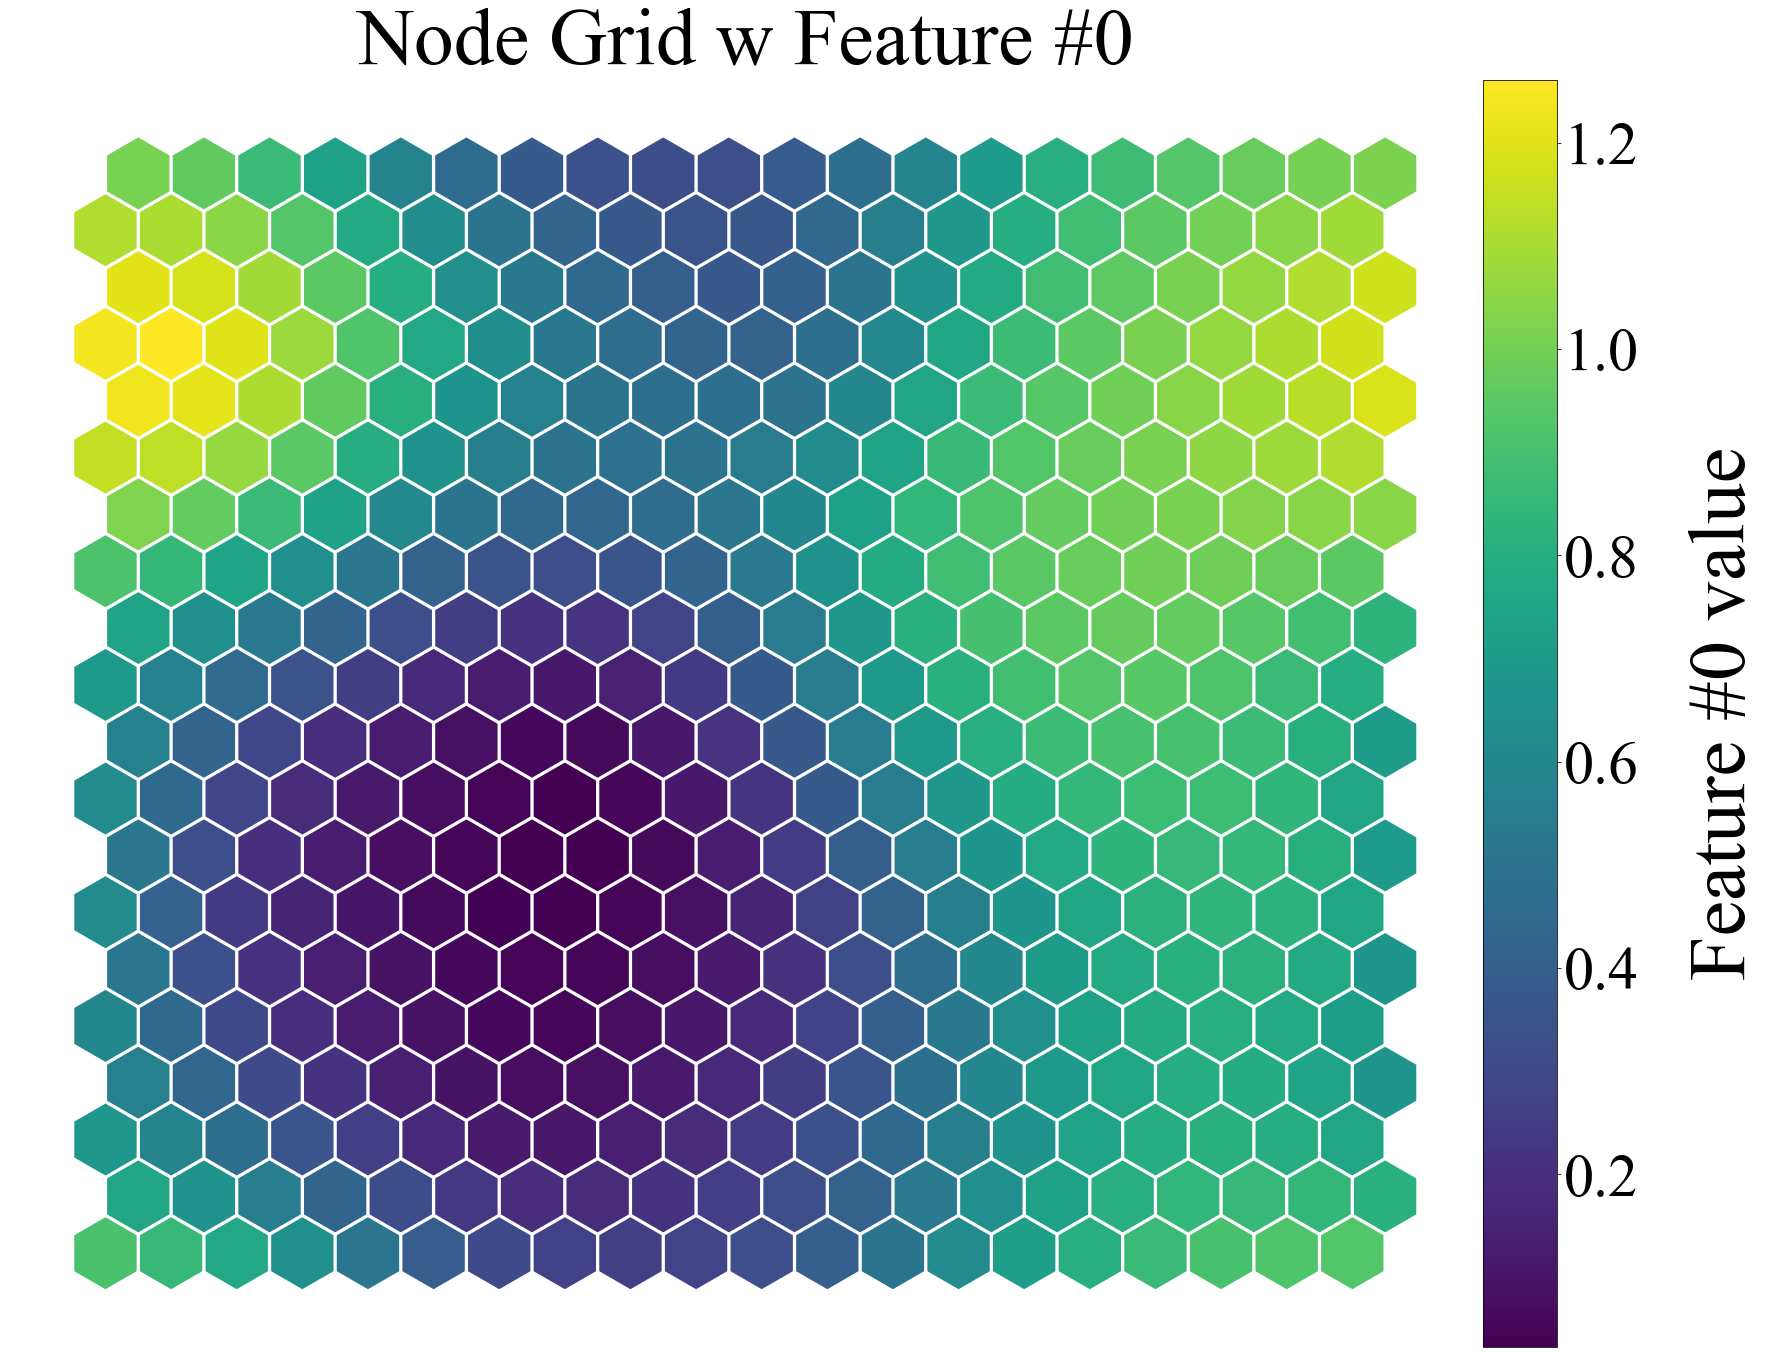

<Figure size 432x288 with 0 Axes>

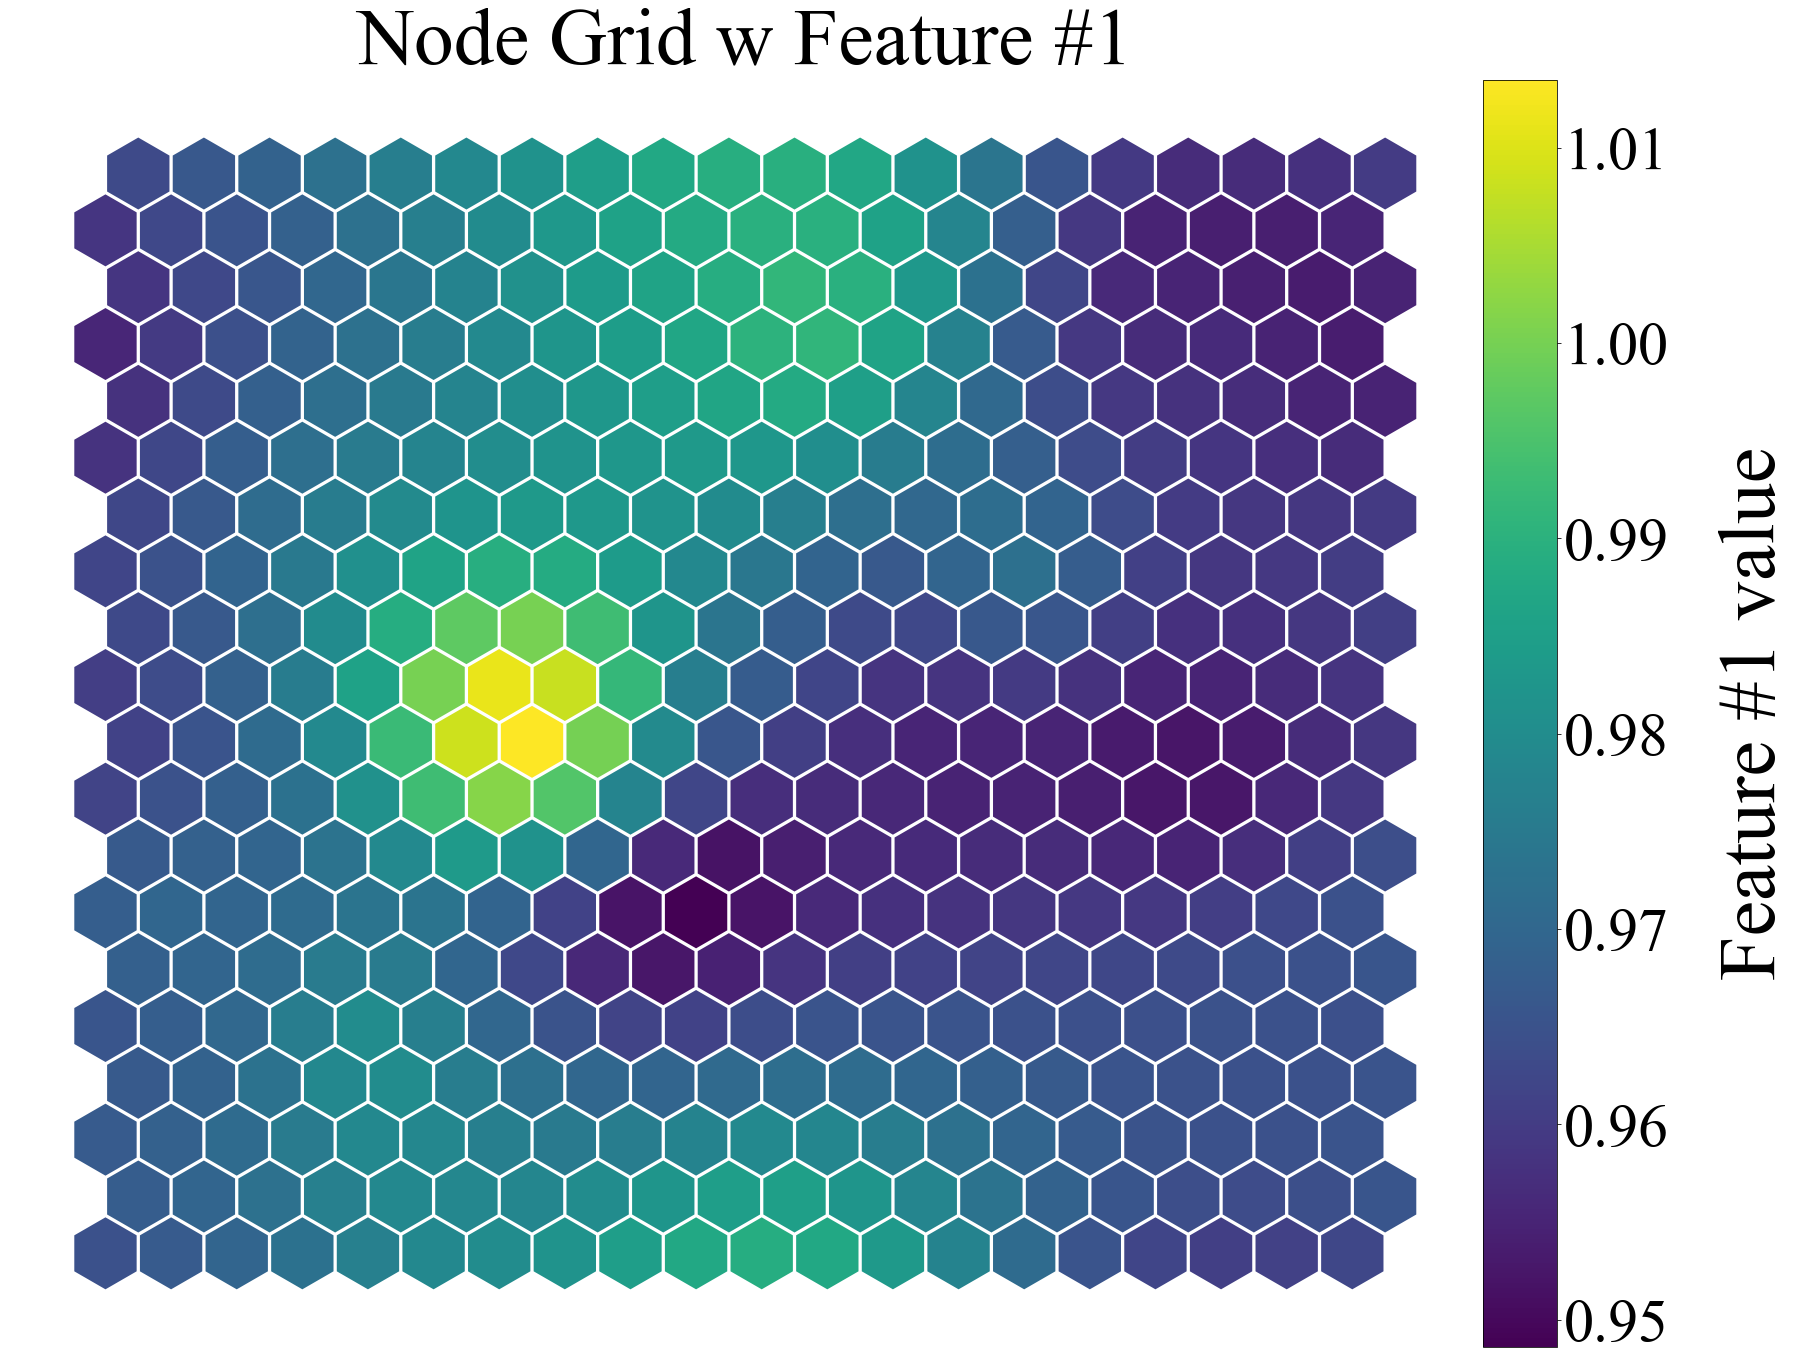

<Figure size 432x288 with 0 Axes>

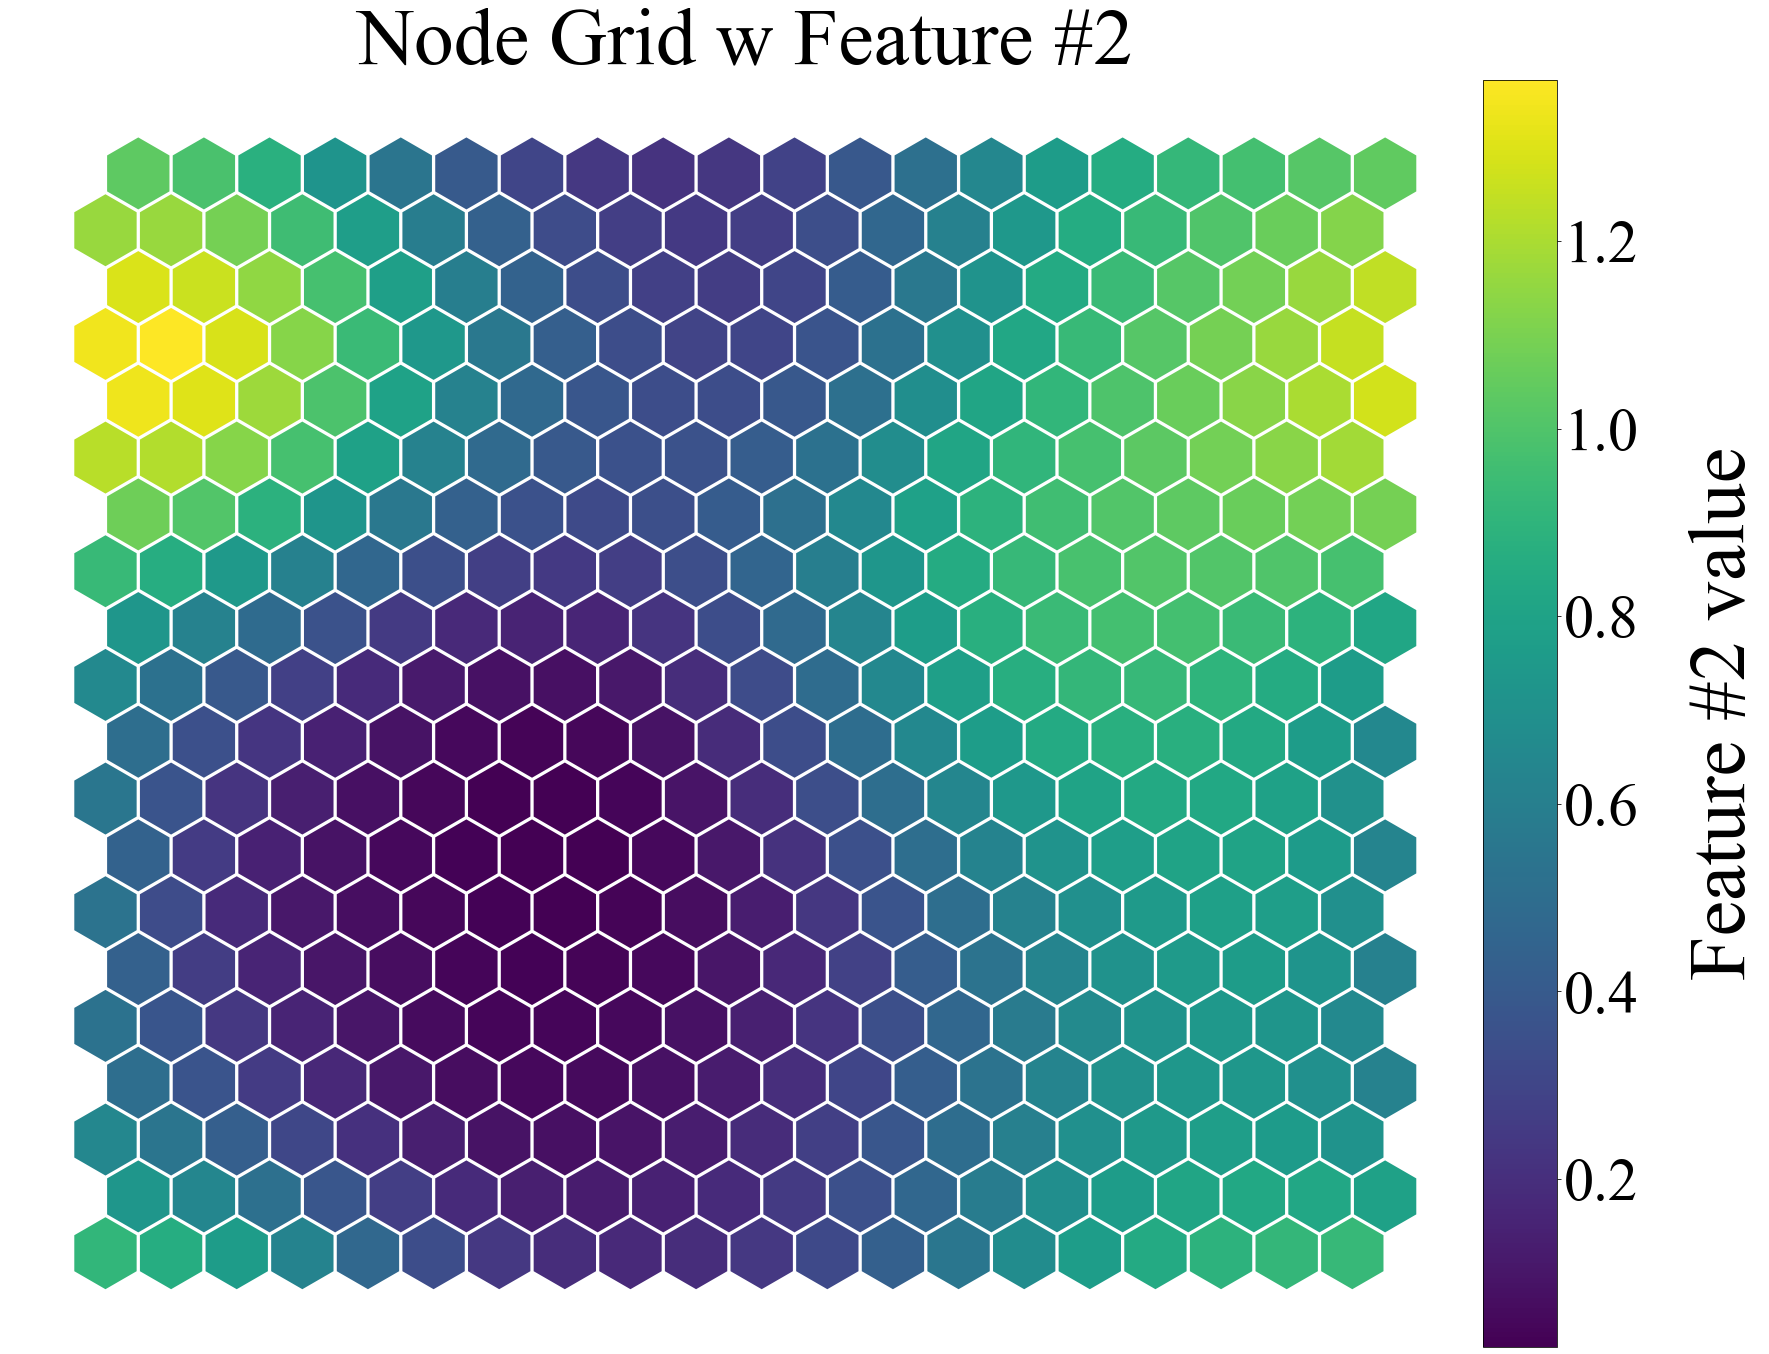

<Figure size 432x288 with 0 Axes>

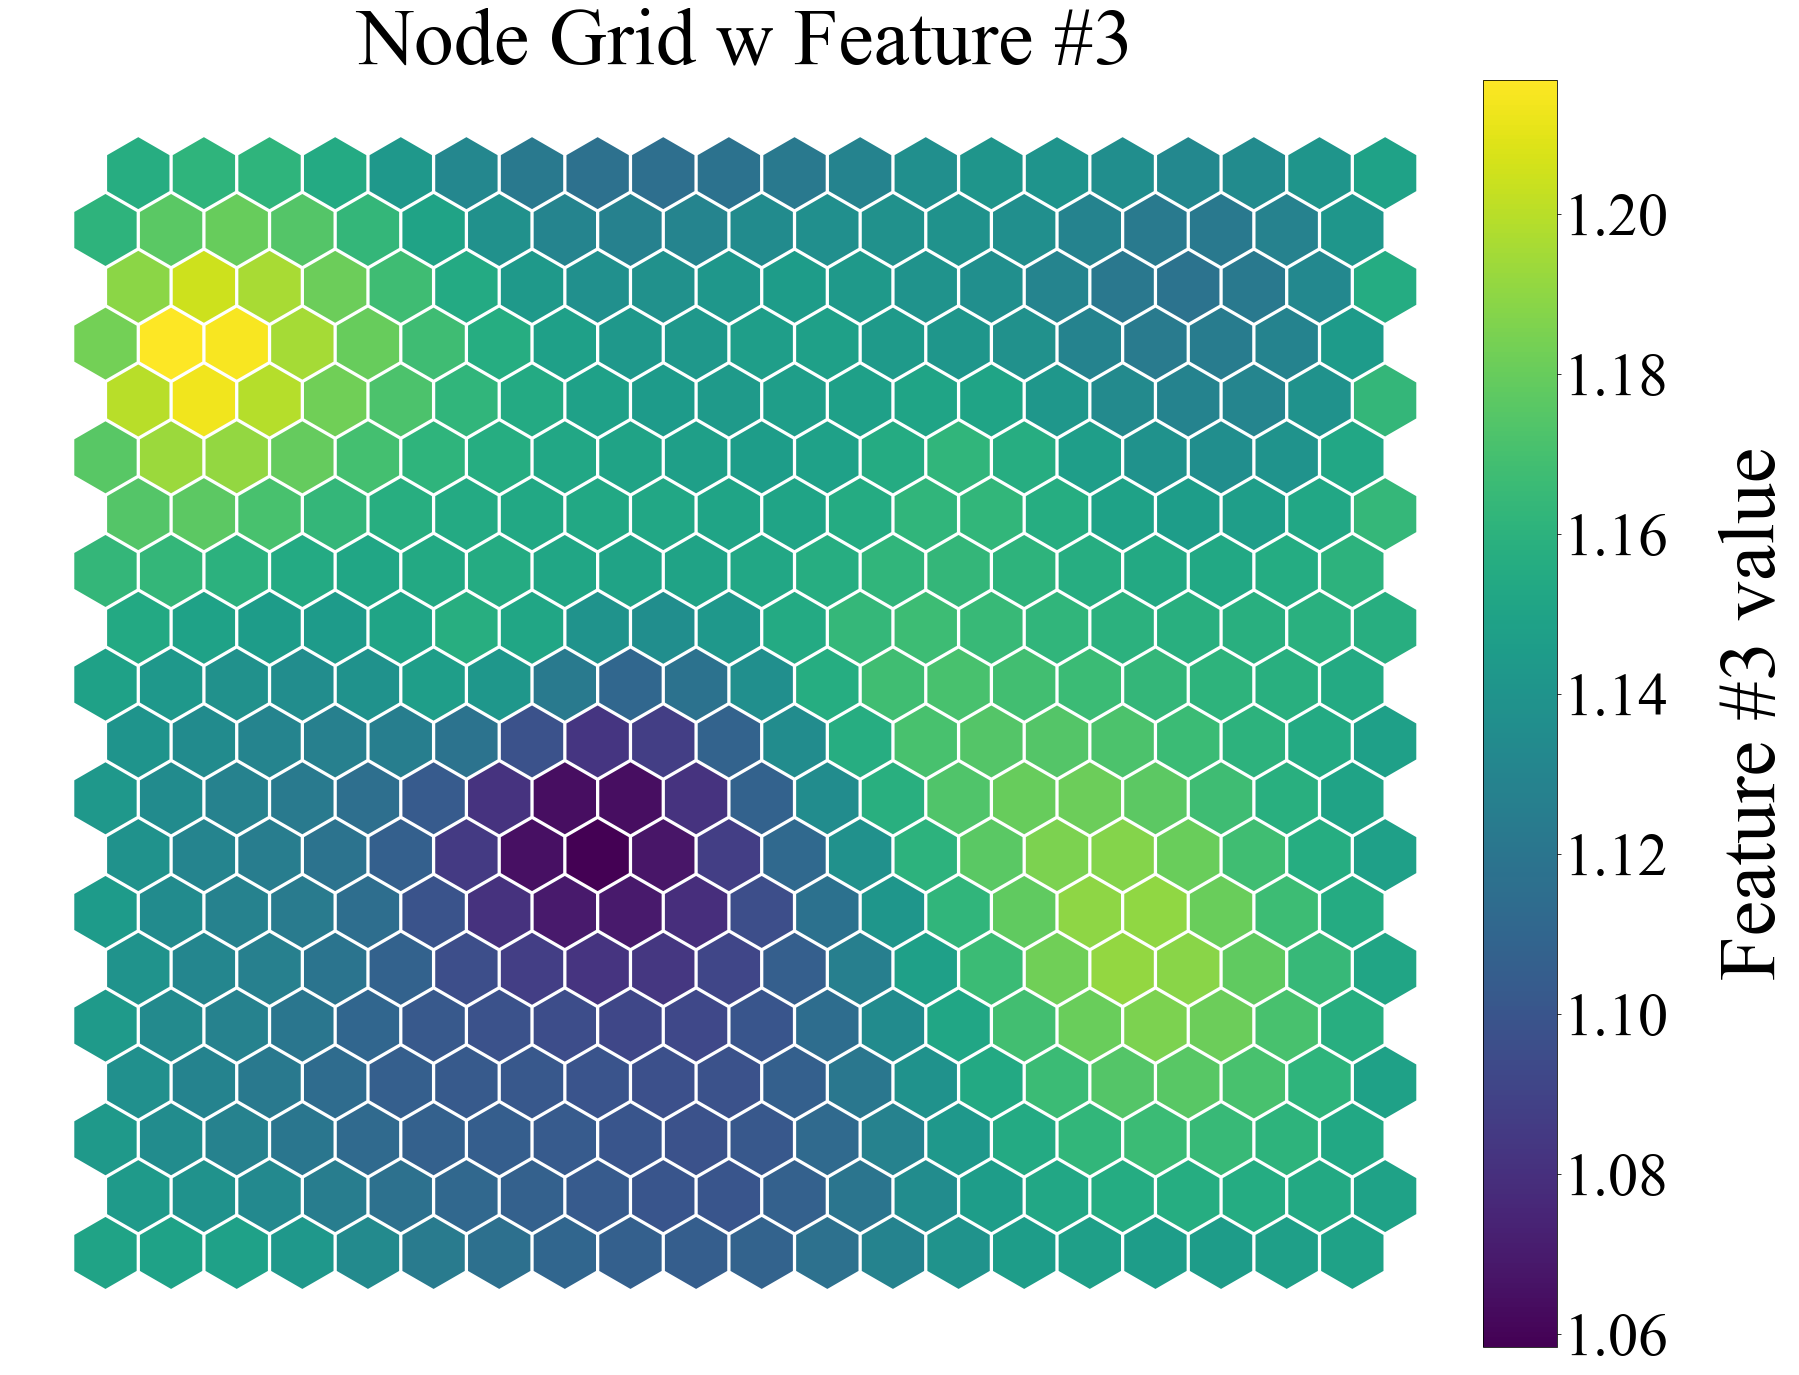

<Figure size 432x288 with 0 Axes>

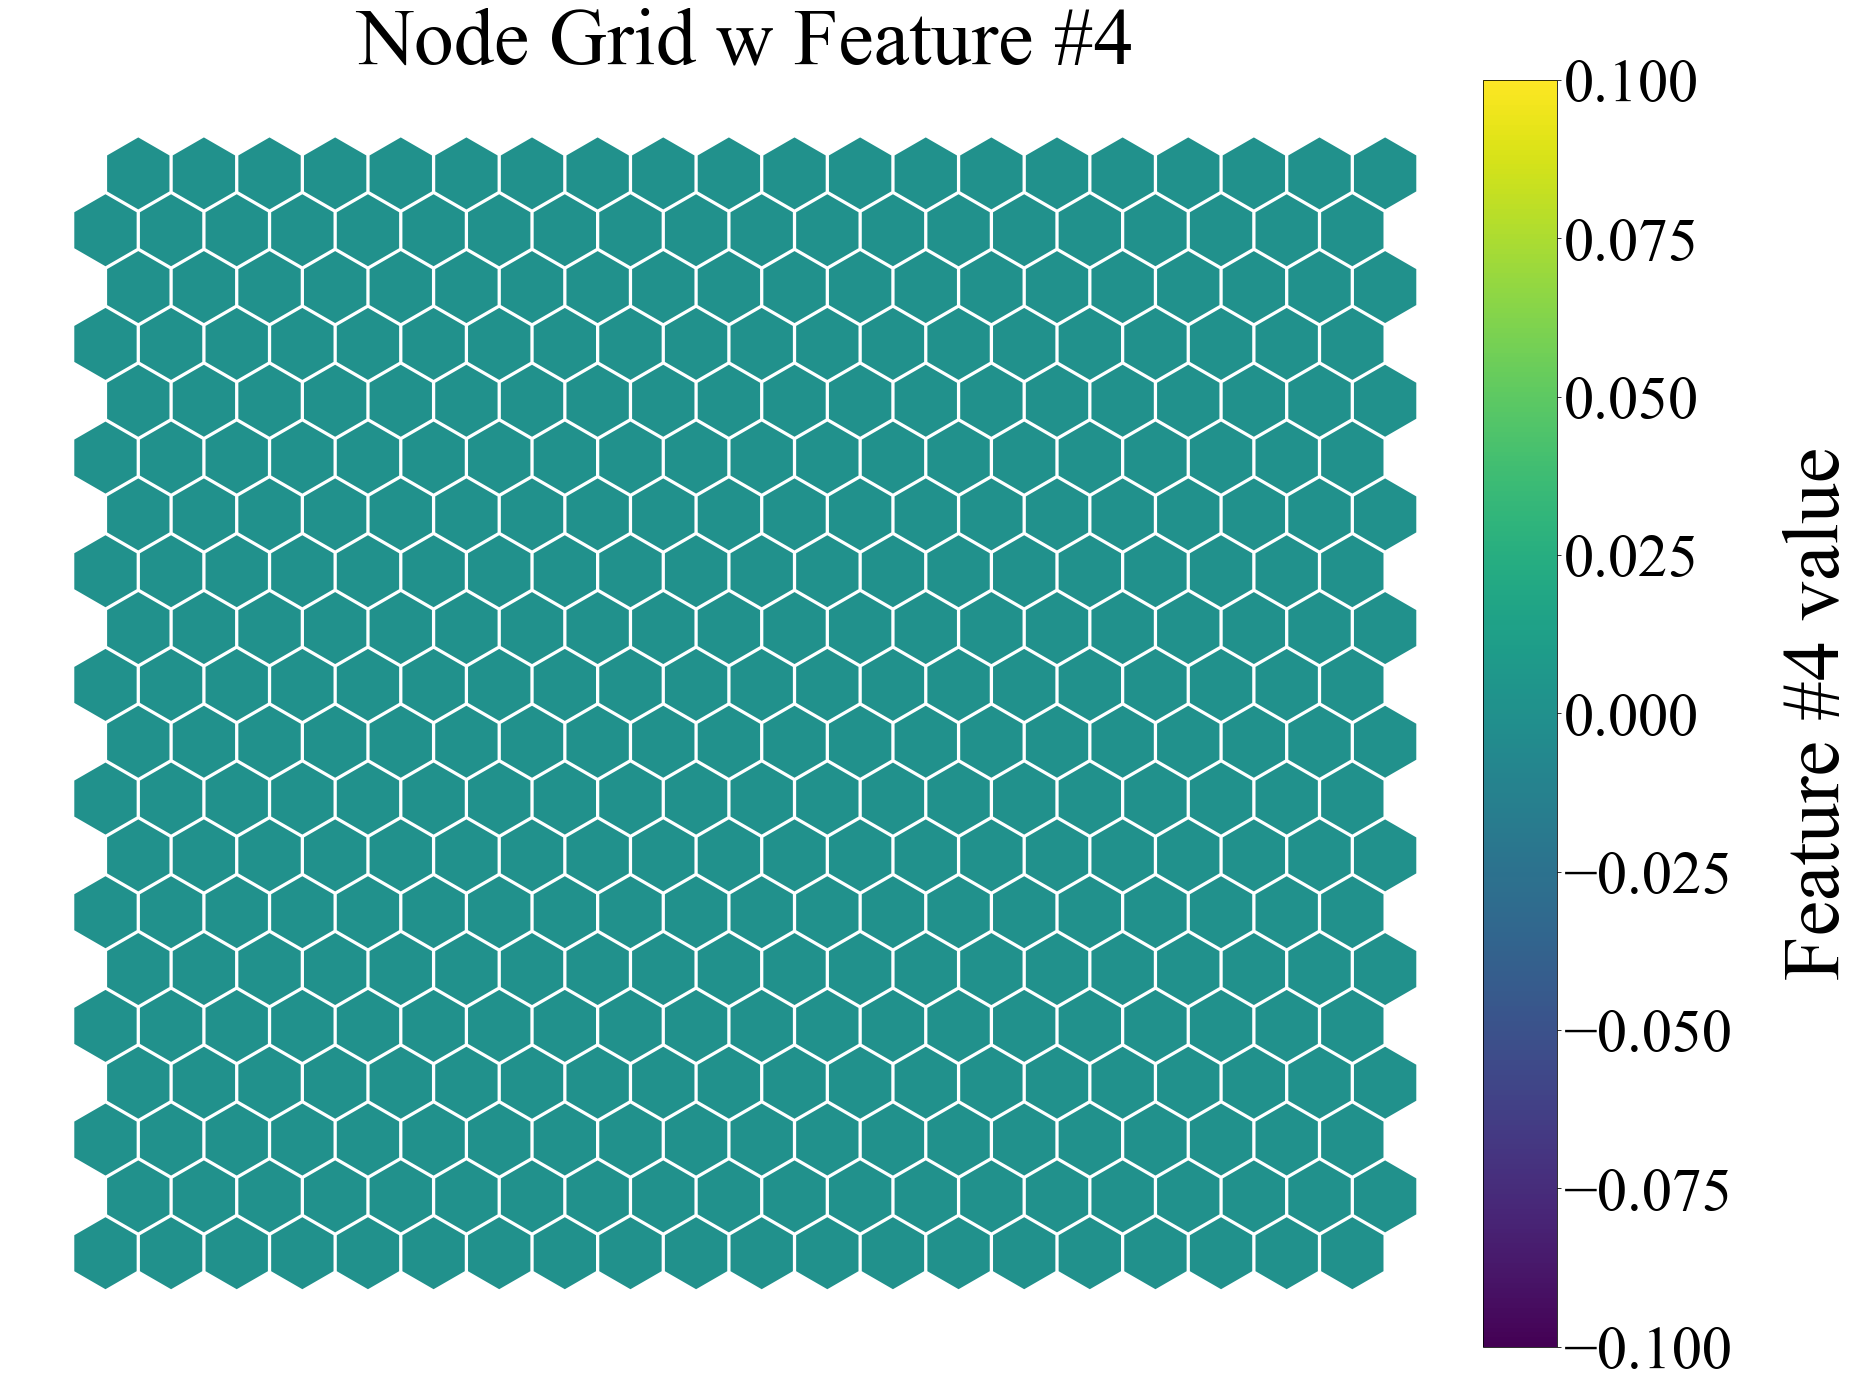

<Figure size 432x288 with 0 Axes>

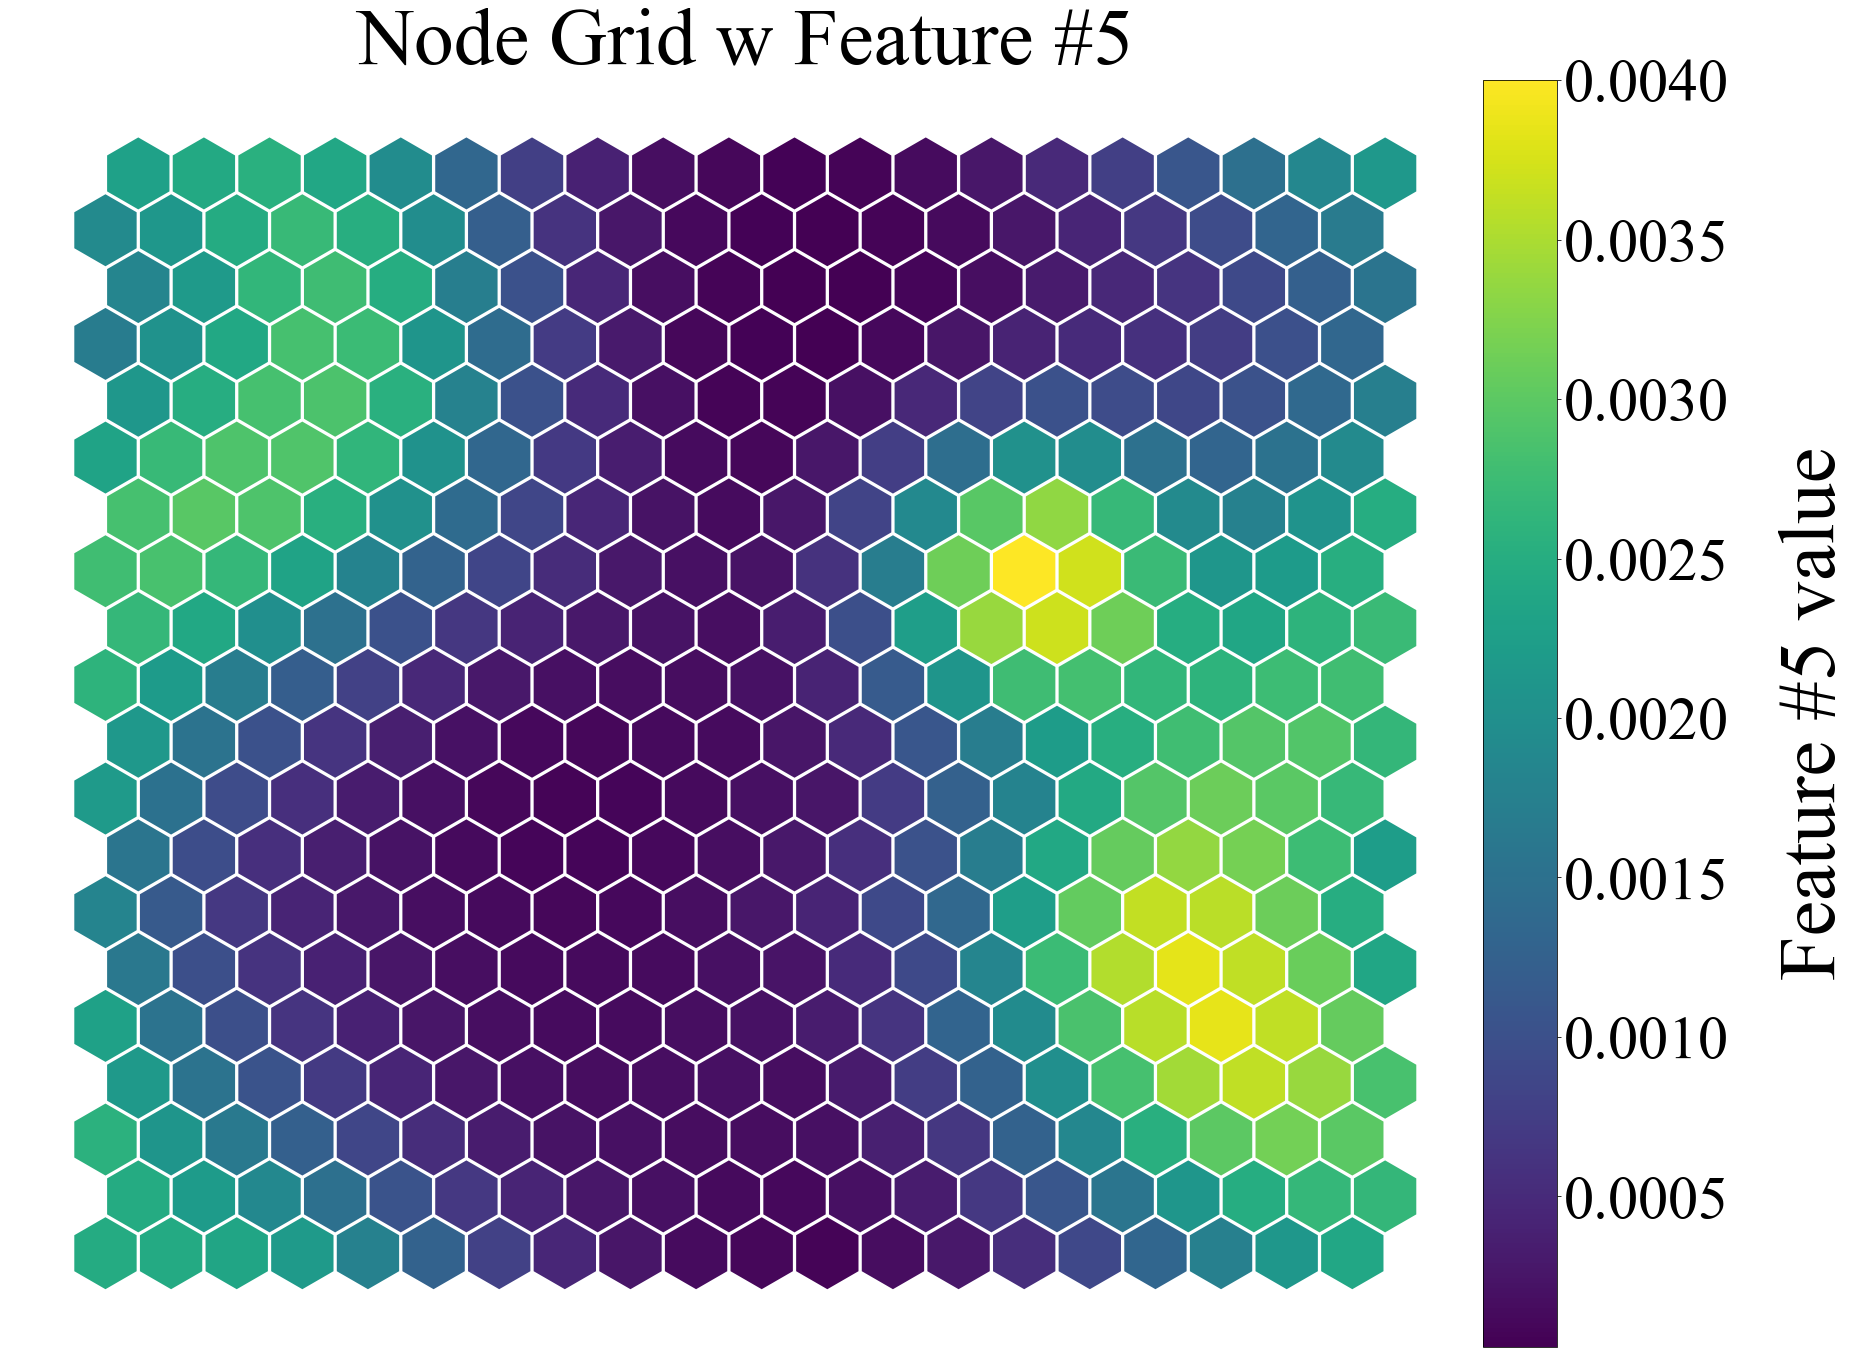

<Figure size 432x288 with 0 Axes>

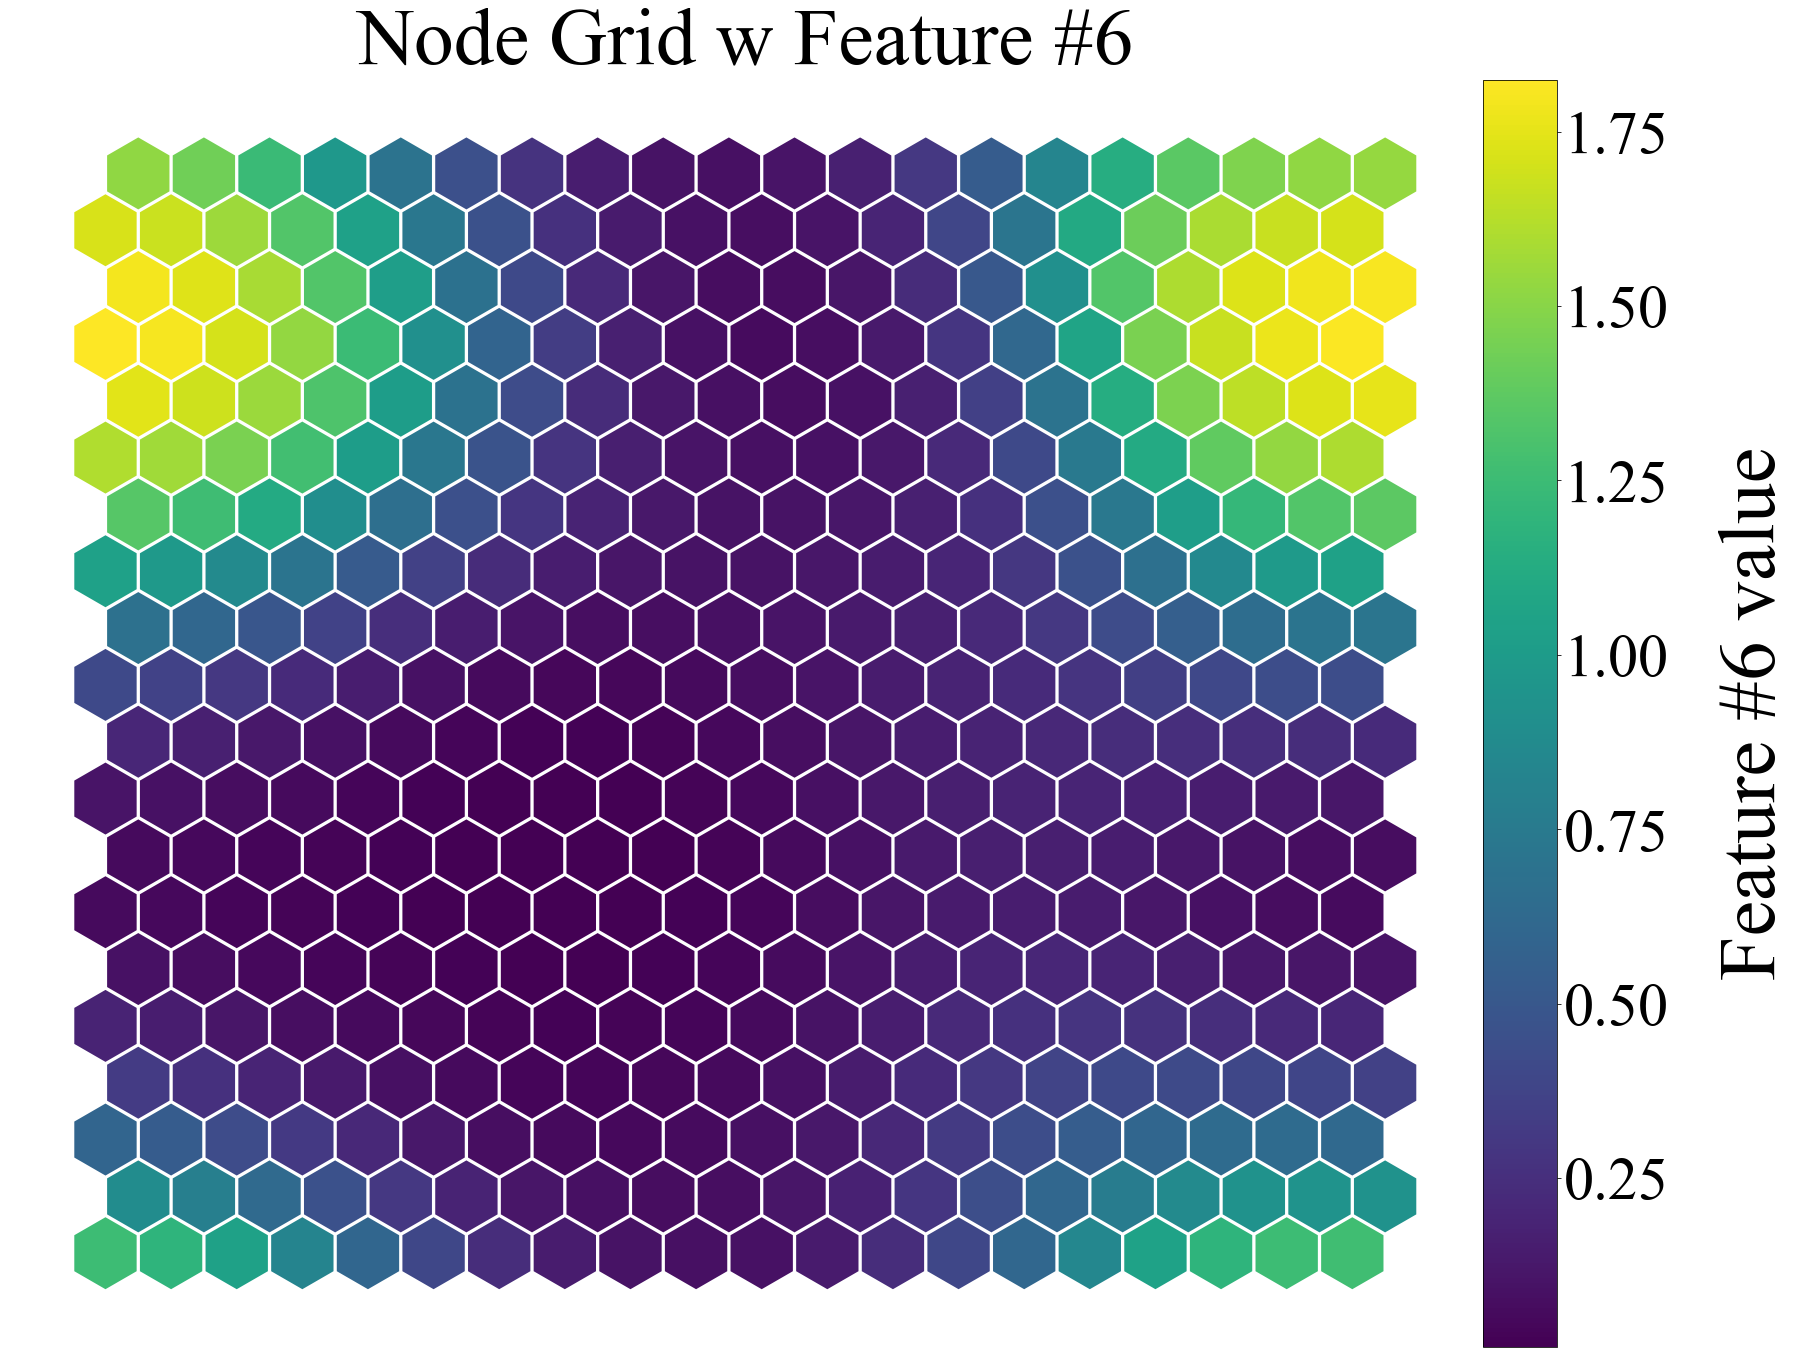

<Figure size 432x288 with 0 Axes>

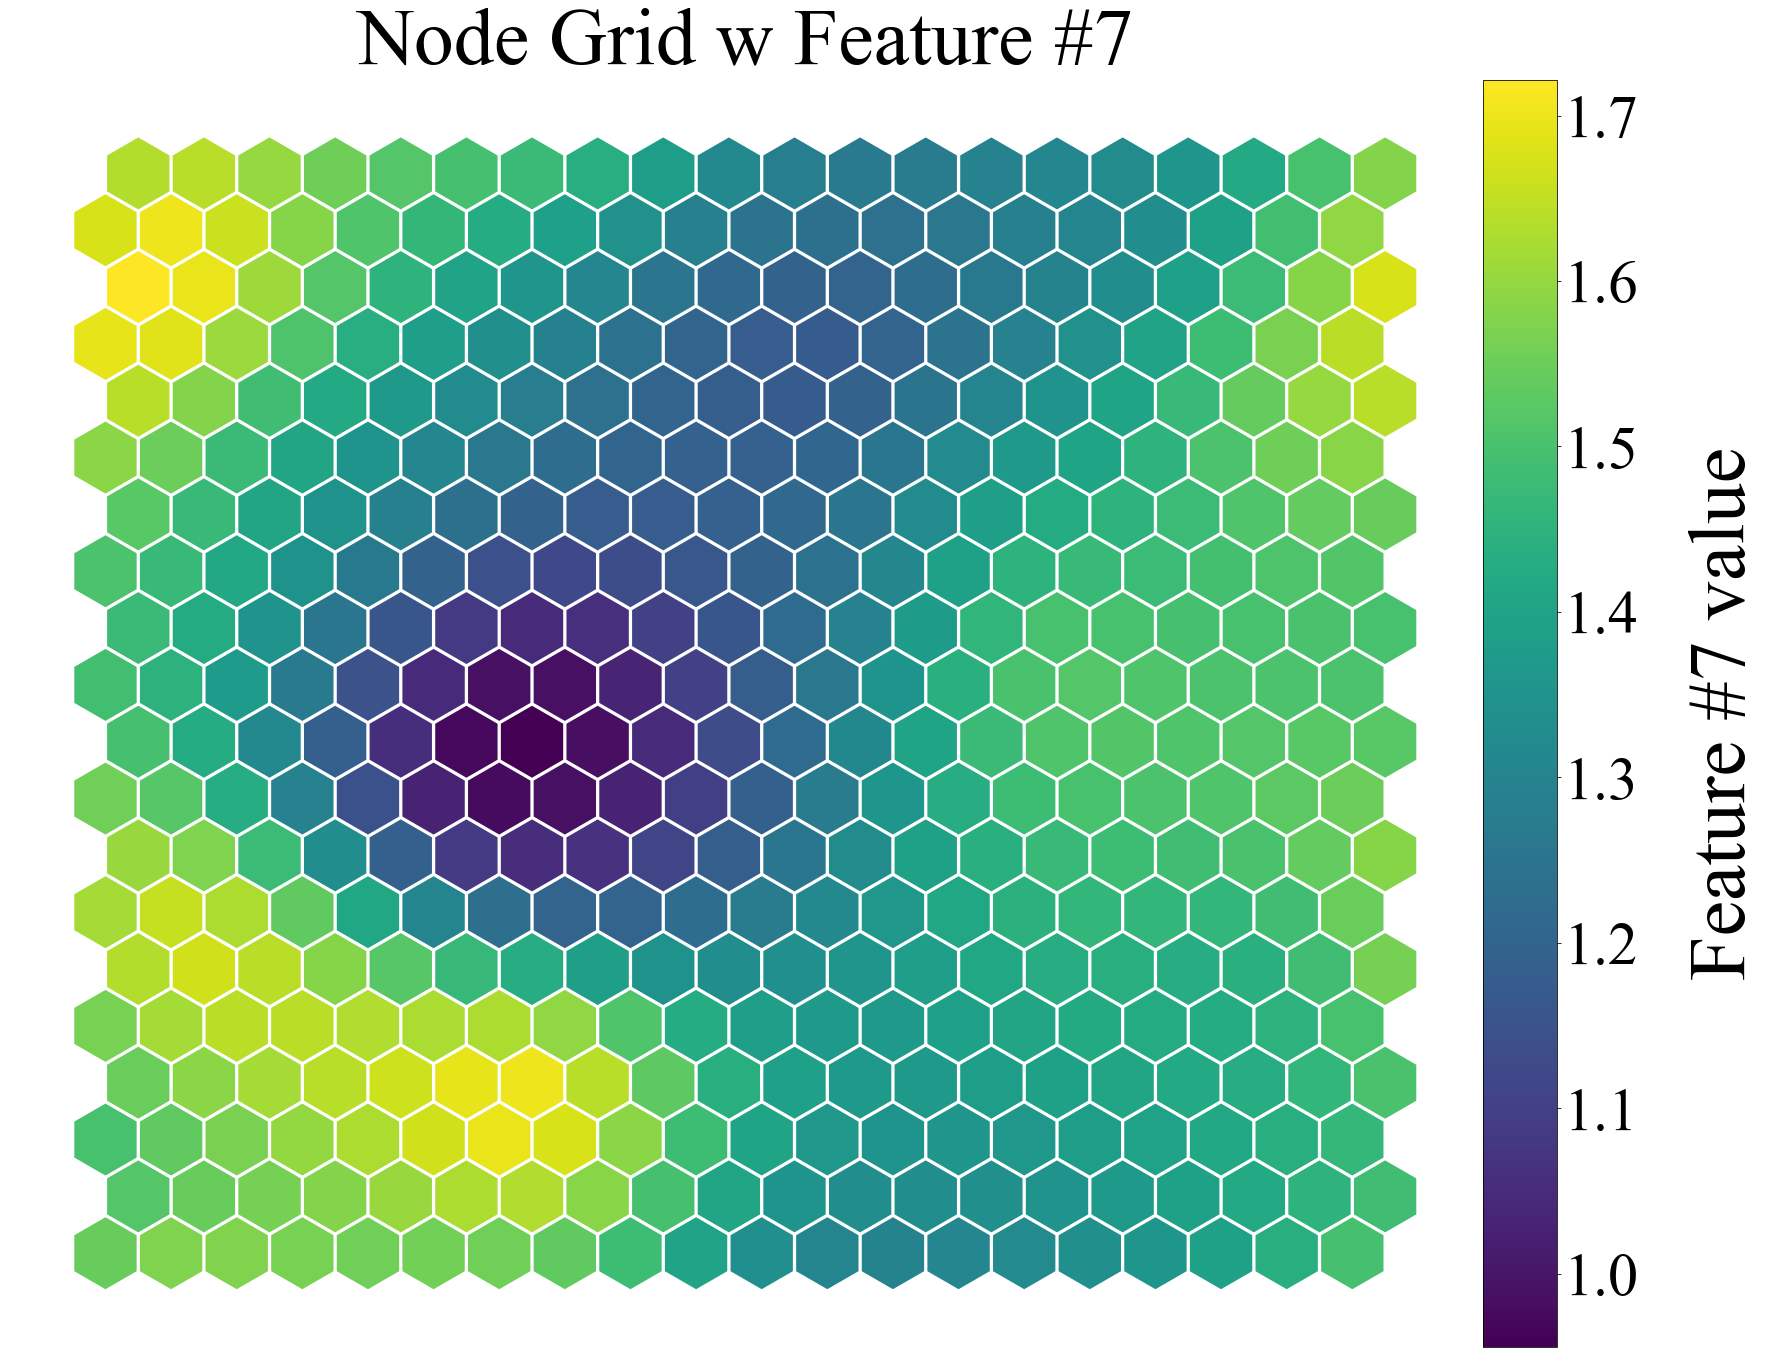

<Figure size 432x288 with 0 Axes>

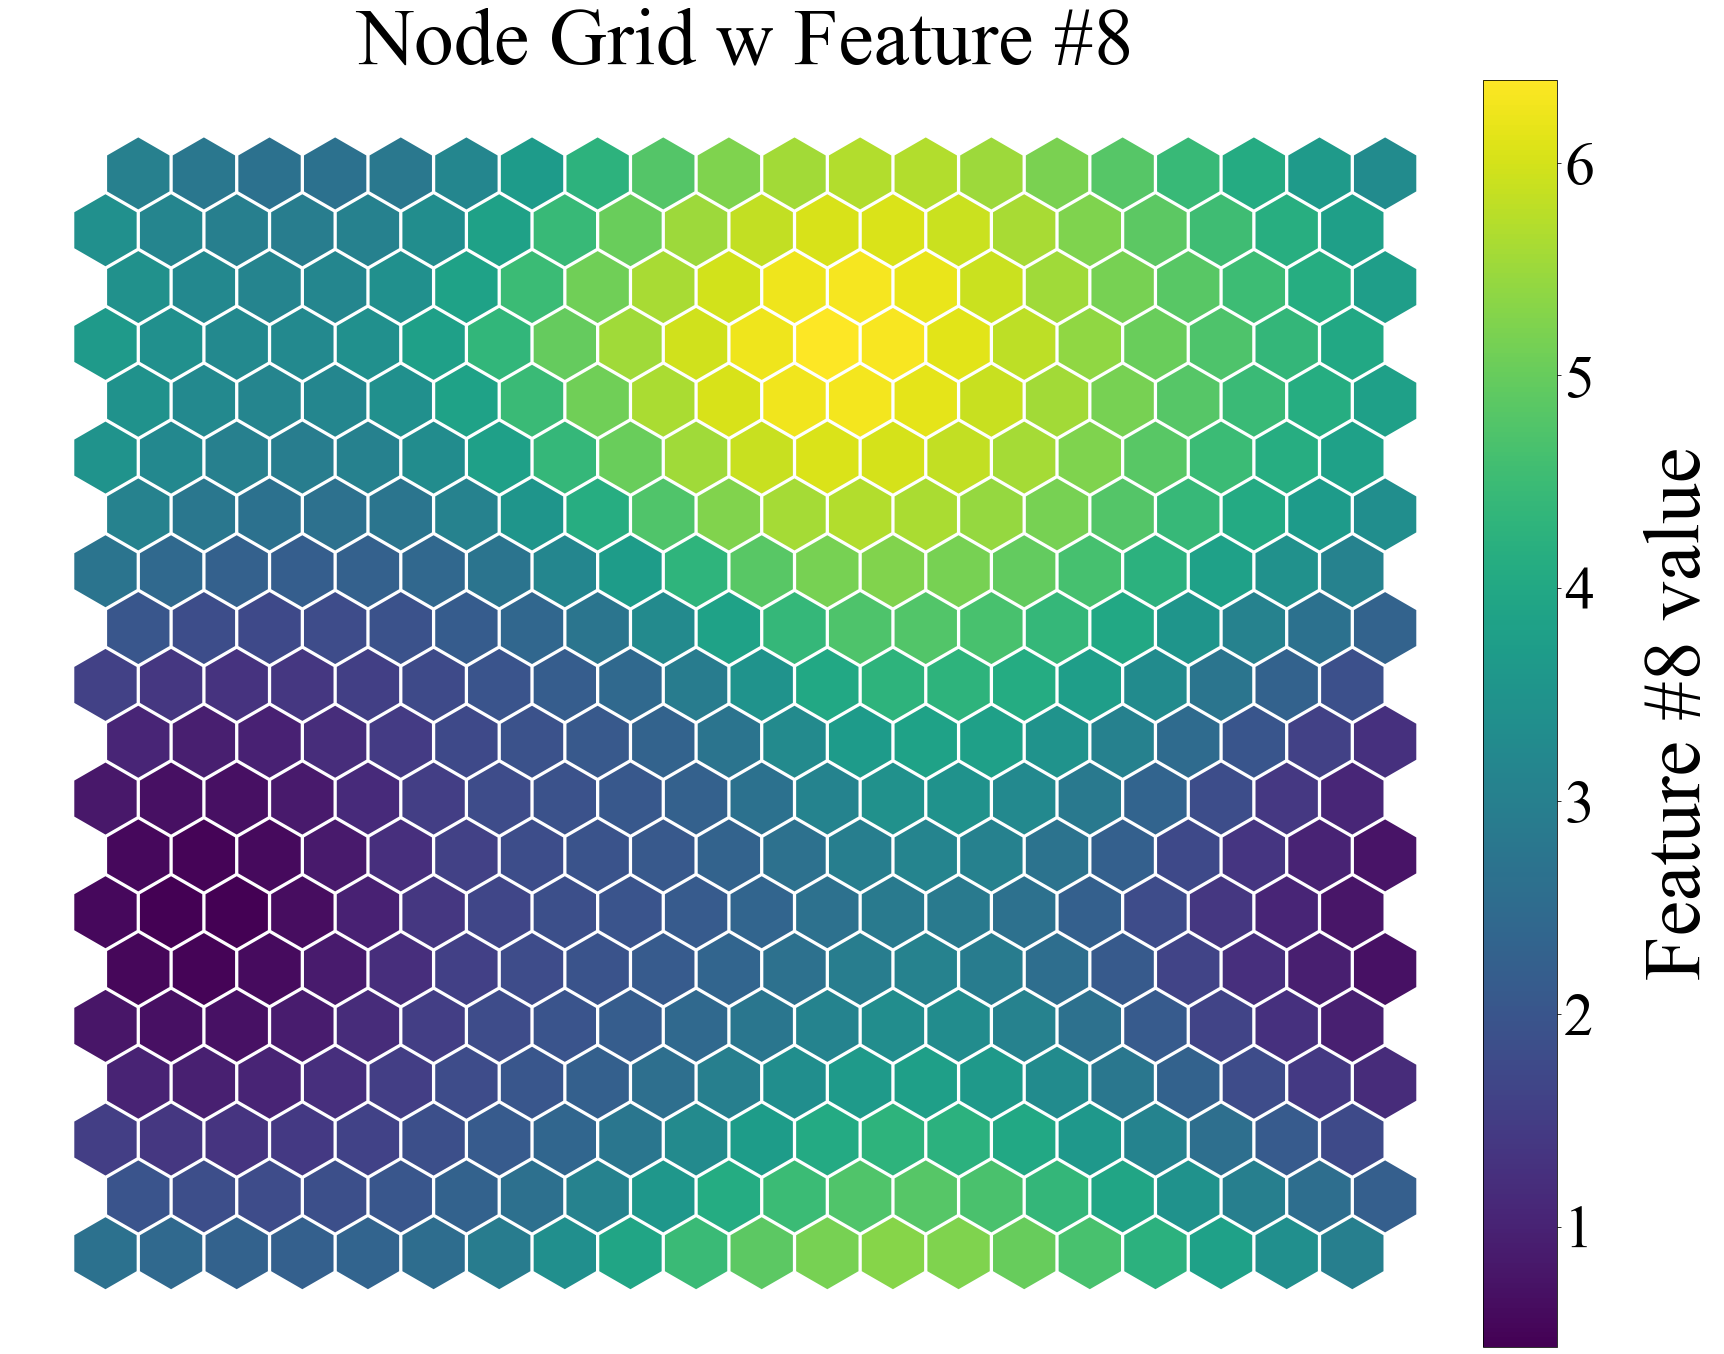

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot Node Grid per Features
for c in range(X_train.shape[1]):
    som.nodes_graph(colnum=c, show=True, printout=True, path='./som_outputs/')

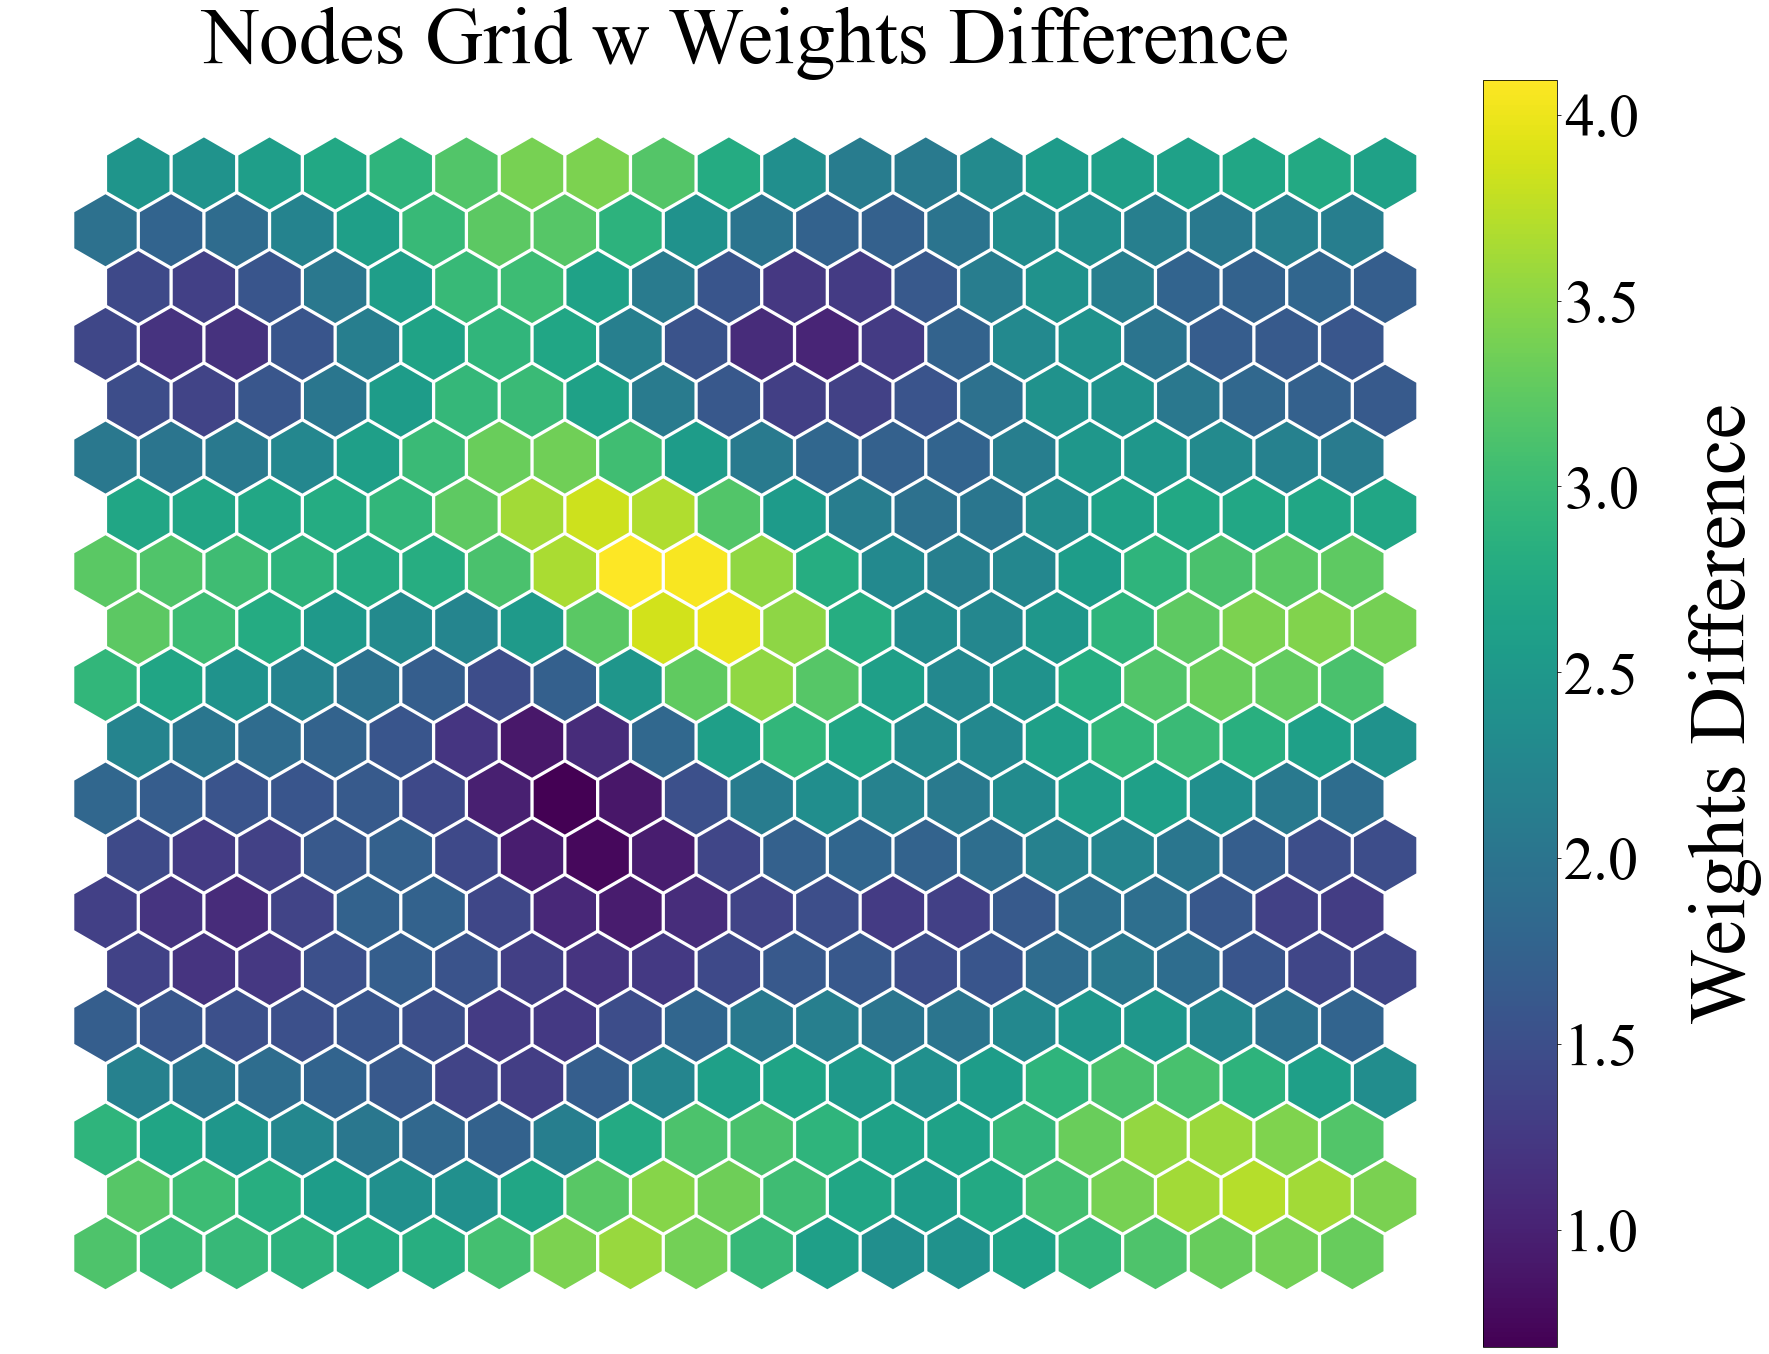

In [12]:
som.diff_graph(path='./som_outputs')

In [13]:
# Project the datapoints on the new 2D network map
som.project(X_train, labels=Y_train, path='./som_outputs/')

[[1, 15.588457268119896],
 [19, 13.856406460551021],
 [2, 5.196152422706632],
 [2, 5.196152422706632],
 [15.5, 14.722431864335457],
 [17.5, 4.330127018922194],
 [14, 8.660254037844387],
 [13, 12.124355652982143],
 [12, 13.856406460551021],
 [0, 5.196152422706632],
 [18.5, 6.062177826491071],
 [17.5, 4.330127018922194],
 [8.5, 16.454482671904337],
 [1, 13.856406460551021],
 [17, 13.856406460551021],
 [8, 0.0],
 [8, 10.392304845413264],
 [9.5, 14.722431864335457],
 [6.5, 2.598076211353316],
 [18.5, 6.062177826491071],
 [11, 13.856406460551021],
 [7, 6.9282032302755105],
 [6.5, 2.598076211353316],
 [2.5, 12.99038105676658],
 [19, 13.856406460551021],
 [17, 13.856406460551021],
 [1, 15.588457268119896],
 [16, 13.856406460551021],
 [2, 5.196152422706632],
 [2, 5.196152422706632],
 [1, 15.588457268119896],
 [7, 6.9282032302755105],
 [8.5, 6.062177826491071],
 [2, 5.196152422706632],
 [7, 6.9282032302755105],
 [11, 13.856406460551021],
 [7, 6.9282032302755105],
 [18.5, 6.062177826491071],
 [1

<Figure size 432x288 with 0 Axes>

In [15]:
# Cluster the datapoints according to the Quality Threshold algorithm
som.cluster(X_train, type='qthresh')

KeyboardInterrupt: 

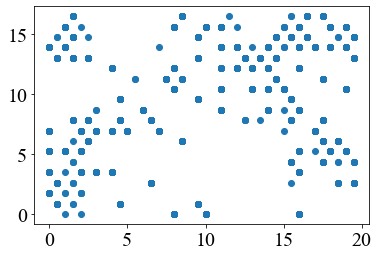

In [16]:
# Clustering the datapoints without label
prj = np.array(som.project(X_train))
plt.scatter(prj.T[0], prj.T[1])
plt.show()

In [21]:
# Combining K-means to Clustering the SOM Maps
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)
labels = kmeans.labels_

In [26]:
X_train[labels==0]

array([[1, 1, 1, ..., 2, 2, 3],
       [0, 1, 0, ..., 0, 2, 5],
       [1, 1, 2, ..., 2, 2, 3],
       ...,
       [1, 1, 1, ..., 2, 0, 3],
       [2, 1, 1, ..., 2, 0, 3],
       [1, 1, 1, ..., 2, 2, 3]])

In [27]:
X_train[labels==1]

array([[0, 1, 0, ..., 0, 2, 0],
       [0, 1, 0, ..., 0, 2, 0],
       [1, 1, 1, ..., 0, 2, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 2],
       [0, 1, 0, ..., 0, 1, 2],
       [0, 1, 0, ..., 0, 2, 2]])

In [28]:
X_train[labels==2]

array([[1, 1, 1, ..., 2, 2, 4],
       [1, 1, 1, ..., 2, 1, 6],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 2, 4],
       [0, 1, 0, ..., 0, 1, 7],
       [1, 1, 1, ..., 0, 1, 6]])